<a href="https://colab.research.google.com/github/rwiddhi-b/CodeClause_CustomerSales/blob/main/Customer_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  #Numerical Python -> Mathematical Operation
import pandas as pd #Data Manipulation
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import re  #Data CLeaning
from sklearn.cluster import KMeans #Model
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler #Converting the categorical data into numerical data

In [2]:
df= pd.read_csv("/content/marketing_campaign.csv",sep="\t")

In [3]:
df.head() #Viewing the first 5 datapoints

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape #Rows and Columns

(2240, 29)

In [5]:
df.info() #Overview of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe() #Statistical Description

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [7]:
df.isna().sum() #sum of null values

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.duplicated().sum() #Sum of Duplicate Values in dataset

0

In [9]:
df.drop("ID",axis=1,inplace=True) #Deleting Id Column

In [10]:
df.head(1) #Showing the 1st datapoint

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1


In [11]:
import datetime #Importing datetime
df["Age"]=datetime.date.today().year-df["Year_Birth"] #Present Age Calculation
df["Age"] #Age Column

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

In [12]:
df.drop("Year_Birth",axis=1,inplace=True) #dropping Year Birth Column

In [13]:
df.Education.value_counts() #unique valurs of education column

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [14]:
df.Marital_Status.value_counts() #Unique values in Marital_Status

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [15]:
df.Education.replace(["Graduation","PhD","Master","2n Cycle","Basic"],["UnderGraduate","Graduate","Graduate","UnderGraduate","UnderGraduate"],inplace=True) #Classifying values into two sets

In [16]:
le=LabelEncoder() #For categorizing data into numerical values

In [17]:
df.Education=le.fit_transform(df.Education) #Chaning value into numerical class

df.Education.value_counts() #Unique Values

1    1384
0     856
Name: Education, dtype: int64

In [18]:
df.Marital_Status.replace(["Married","Together","Single","Divorced","Widow","Alone","Absurd","YOLO"],["Married","Married","UnMarried","UnMarried","UnMarried","UnMarried","UnMarried","UnMarried"],inplace=True)

df.Marital_Status.value_counts() #Unique categories

Married      1444
UnMarried     796
Name: Marital_Status, dtype: int64

In [19]:
df.Marital_Status=le.fit_transform(df.Marital_Status) #Converting Categorical data into numerical

df.Marital_Status.value_counts() #Unique Category

0    1444
1     796
Name: Marital_Status, dtype: int64

In [20]:
df.Income.describe() #description of Income

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: >

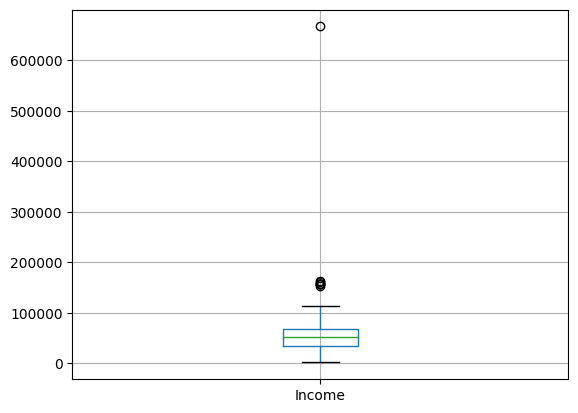

In [21]:
df[["Income"]].boxplot() #Visualizing Outliers

In [22]:
df.Income.fillna(df.Income.median(),inplace=True) #filling null values with median

df.Income.isna().sum() #Checking count of null values

0

<Axes: >

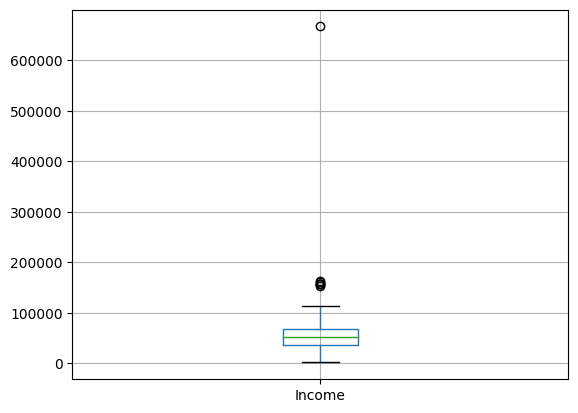

In [23]:
df[["Income"]].boxplot() #Visualizing Income

In [24]:
in_mean=df.Income.mean()
in_std=df.Income.std()
threshold=3
outliers=[] ##creating outliers list

for i in df.Income:
  z=(i-in_mean)/in_std
  if z>threshold:
    outliers.append(i) #appending values in list

outliers #outliers in income

[157243.0,
 162397.0,
 153924.0,
 160803.0,
 157733.0,
 157146.0,
 156924.0,
 666666.0]

<Axes: >

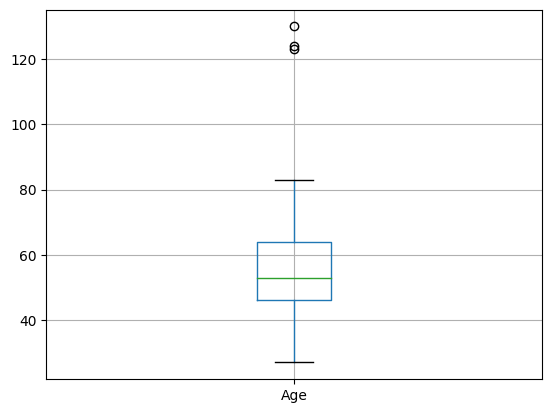

In [25]:
df[["Age"]].boxplot() #visualizing age

In [26]:
age_mean=df.Age.mean()
age_std=df.Age.std()
threshold=3
age_outliers=[] #creating age_outliers list

for i in df.Age:
  z=(i-age_mean)/age_std
  if z>threshold:
    age_outliers.append(i) #appending outliers in list

age_outliers #outliers in age column

[123, 130, 124]

In [27]:
int(df.Age.median()) #Integer median

53

In [28]:
df.Age.replace(age_outliers,[int(df.Age.median()),int(df.Age.median()),int(df.Age.median())],inplace=True) #replacing outliers with median

<Axes: >

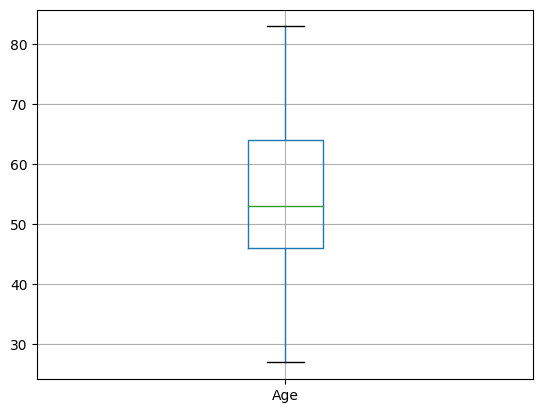

In [29]:
df[["Age"]].boxplot() #visualization of age column

In [30]:
df["ChildrenHome"]=df.Kidhome+df.Teenhome #combing two columns into one

df["ChildrenHome"] #all values of Childrenhome

df.drop(["Kidhome","Teenhome"],axis=1,inplace=True) #dropping 2 columns

df.head(1) #1st row

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome
0,1,1,58138.0,04-09-2012,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,66,0


In [31]:
type(df.Dt_Customer[9]) #type of column

str

In [32]:
pd.DatetimeIndex(df["Dt_Customer"]).year #Present year in column

<ipython-input-32-78b9482046ea>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.DatetimeIndex(df["Dt_Customer"]).year #Present year in column


Int64Index([2012, 2014, 2013, 2014, 2014, 2013, 2012, 2013, 2013, 2014,
            ...
            2013, 2012, 2012, 2013, 2013, 2013, 2014, 2014, 2014, 2012],
           dtype='int64', name='Dt_Customer', length=2240)

In [33]:
df.Dt_Customer=datetime.date.today().year-pd.DatetimeIndex(df["Dt_Customer"]).year #Total time

df.head() #top 5 rows

<ipython-input-33-c187d37949a8>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.Dt_Customer=datetime.date.today().year-pd.DatetimeIndex(df["Dt_Customer"]).year #Total time


,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome
0,1,1,58138.0,11,58,635,88,546,172,88,...,0,0,0,0,0,3,11,1,66,0
1,1,1,46344.0,9,38,11,1,6,2,1,...,0,0,0,0,0,3,11,0,69,2
2,1,0,71613.0,10,26,426,49,127,111,21,...,0,0,0,0,0,3,11,0,58,0
3,1,0,26646.0,9,26,11,4,20,10,3,...,0,0,0,0,0,3,11,0,39,1
4,0,0,58293.0,9,94,173,43,118,46,27,...,0,0,0,0,0,3,11,0,42,1


In [34]:
df["Spent"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"] #new column

df.drop(["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"],axis=1,inplace=True) #Dropping 8 columns

df.head(1) #1st row

,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome,Spent
0,1,1,58138.0,11,58,3,8,10,4,7,...,0,0,0,0,3,11,1,66,0,1617


In [35]:
df.columns #All column names

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'ChildrenHome', 'Spent'],
      dtype='object')

In [36]:
df["Purchase"]=df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"]+df["NumWebVisitsMonth"] #new column

df.drop(["NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth"],axis=1,inplace=True) #Dropping 5 Columns

df.head(1) #1st row

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,ChildrenHome,Spent,Purchase
0,1,1,58138.0,11,58,0,0,0,0,0,0,3,11,1,66,0,1617,32


In [37]:
df.drop(["Z_CostContact","Z_Revenue"],axis=1,inplace=True) #Dropping 2 columns

df.info() #Information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2240 non-null   int64  
 1   Marital_Status  2240 non-null   int64  
 2   Income          2240 non-null   float64
 3   Dt_Customer     2240 non-null   int64  
 4   Recency         2240 non-null   int64  
 5   AcceptedCmp3    2240 non-null   int64  
 6   AcceptedCmp4    2240 non-null   int64  
 7   AcceptedCmp5    2240 non-null   int64  
 8   AcceptedCmp1    2240 non-null   int64  
 9   AcceptedCmp2    2240 non-null   int64  
 10  Complain        2240 non-null   int64  
 11  Response        2240 non-null   int64  
 12  Age             2240 non-null   int64  
 13  ChildrenHome    2240 non-null   int64  
 14  Spent           2240 non-null   int64  
 15  Purchase        2240 non-null   int64  
dtypes: float64(1), int64(15)
memory usage: 280.1 KB


In [38]:
"""#Feature Scaling"""

scaler=MinMaxScaler() #to convert all values between 0 and 1

scaler_df=scaler.fit_transform(df) #coverting adatset into 0 ans 1

scaler_df[0] #values in 1st row

array([1.        , 1.        , 0.08483222, 1.        , 0.58585859,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.69642857, 0.        , 0.63968254,
       0.69565217])

Text(0.5, 1.0, 'Elbow Plot')

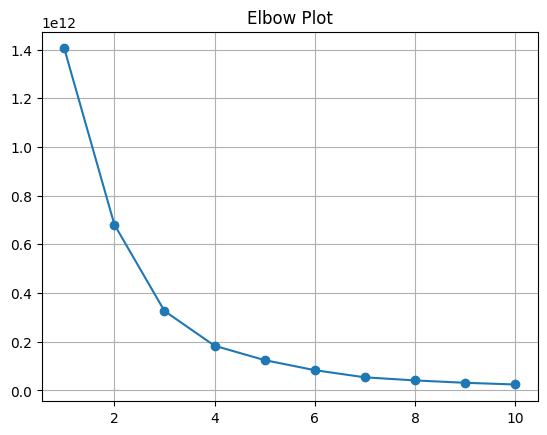

In [39]:
ssd=[]
for i in range(1,11):
  Kmodel=KMeans(n_clusters=i,n_init=15,max_iter=500)
  Kmodel.fit(df)
  ssd.append(Kmodel.inertia_) #Inertia indicates all the errors

plt.plot(range(1,11),ssd,marker="o")
plt.grid()
plt.title("Elbow Plot")

In [40]:
#k=6 We are taking the value of k=6

Kmodel=KMeans(n_clusters=6) #clusters

Kmodel.fit(df) #fitting model

predict=Kmodel.predict(df) #modeling

predict[:10] #prediction in 10 rows



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 1, 5, 3, 3, 3, 0, 5, 5], dtype=int32)

In [41]:
df["Cluster"]=predict #prediction

df.head() #1st 5 row

,Education,Marital_Status,Income,Dt_Customer,Recency,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,ChildrenHome,Spent,Purchase,Cluster
0,1,1,58138.0,11,58,0,0,0,0,0,0,1,66,0,1617,32,3
1,1,1,46344.0,9,38,0,0,0,0,0,0,0,69,2,27,11,0
2,1,0,71613.0,10,26,0,0,0,0,0,0,0,58,0,776,25,1
3,1,0,26646.0,9,26,0,0,0,0,0,0,0,39,1,53,14,5
4,0,0,58293.0,9,94,0,0,0,0,0,0,0,42,1,422,24,3
